# Better ELM filtering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
from savitzky_golay import *
from smoothAm import smoothAm
import dd
from getsig import getsig
#
plt.style.use('helvet2')
#
shotnr = 30554

rl05 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snelfs_0.500000')
rl10 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snelfs_1.00000')
rl20 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snelfs_2.00000')
rl30 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snelfs_3.00000')
#rl40 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snelfs_4.00000')

raus = np.loadtxt('/home/guimas/diags/'+str(shotnr)+'/FPG.Raus')

rh05 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snehfs_0.500000')
rh10 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snehfs_1.00000')
rh20 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snehfs_2.00000')
rh30 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snehfs_3.00000')
#rh40 = np.loadtxt('/home/guimas/layers/'+str(shotnr)+'/snehfs_4.00000')
rin = np.loadtxt('/home/guimas/diags/'+str(shotnr)+'/FPG.Rin')

lfsr = getsig(shotnr, 'RDL', 'LFSR')
hfsr = getsig(shotnr, 'RDL', 'HFSR')

/afs/ipp/aug/ads-diags/common/python/lib/dd_20180216.py:117: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


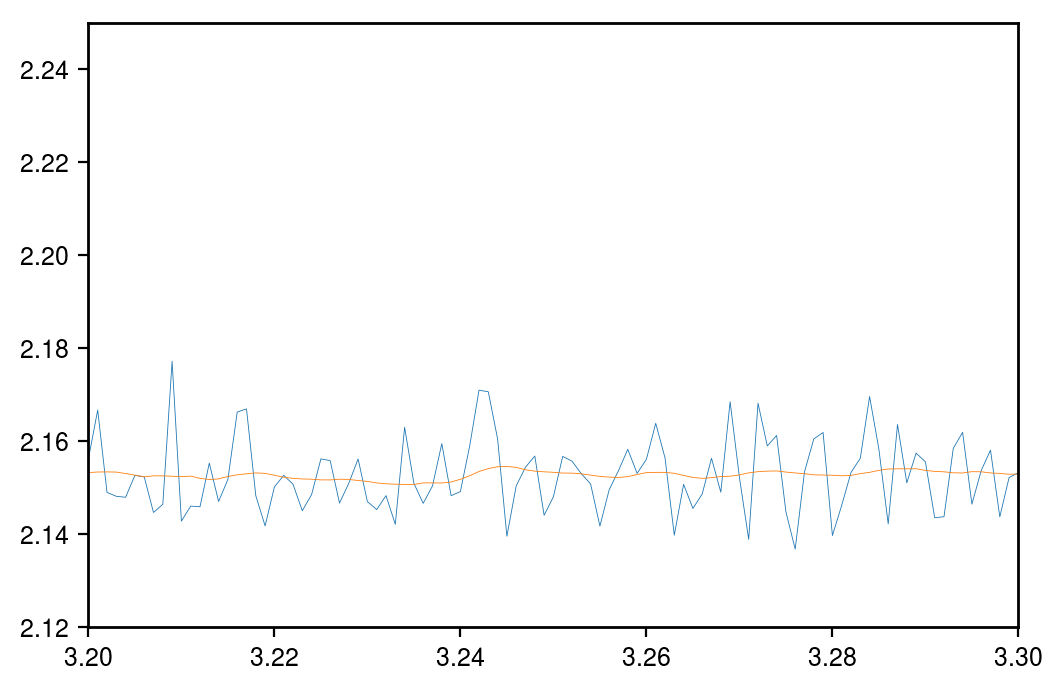

In [14]:
plt.figure(dpi=200)
plt.plot(lfsr.time, lfsr.data[:,3],lw=0.3)
plt.plot(rl20[:,0],rl20[:,1],lw=0.3)
plt.xlim(3.2,3.3)
plt.ylim(2.12,2.25)
plt.show()

In [16]:
shotnr = 35127
h1 = getsig(shotnr,'DCN','H-1')
h5 = getsig(shotnr,'DCN','H-5')
raus = getsig(shotnr, 'FPG', 'Raus')
dtot = getsig(shotnr, 'UVS', 'D_tot')

/afs/ipp/aug/ads-diags/common/python/lib/dd_20180216.py:117: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


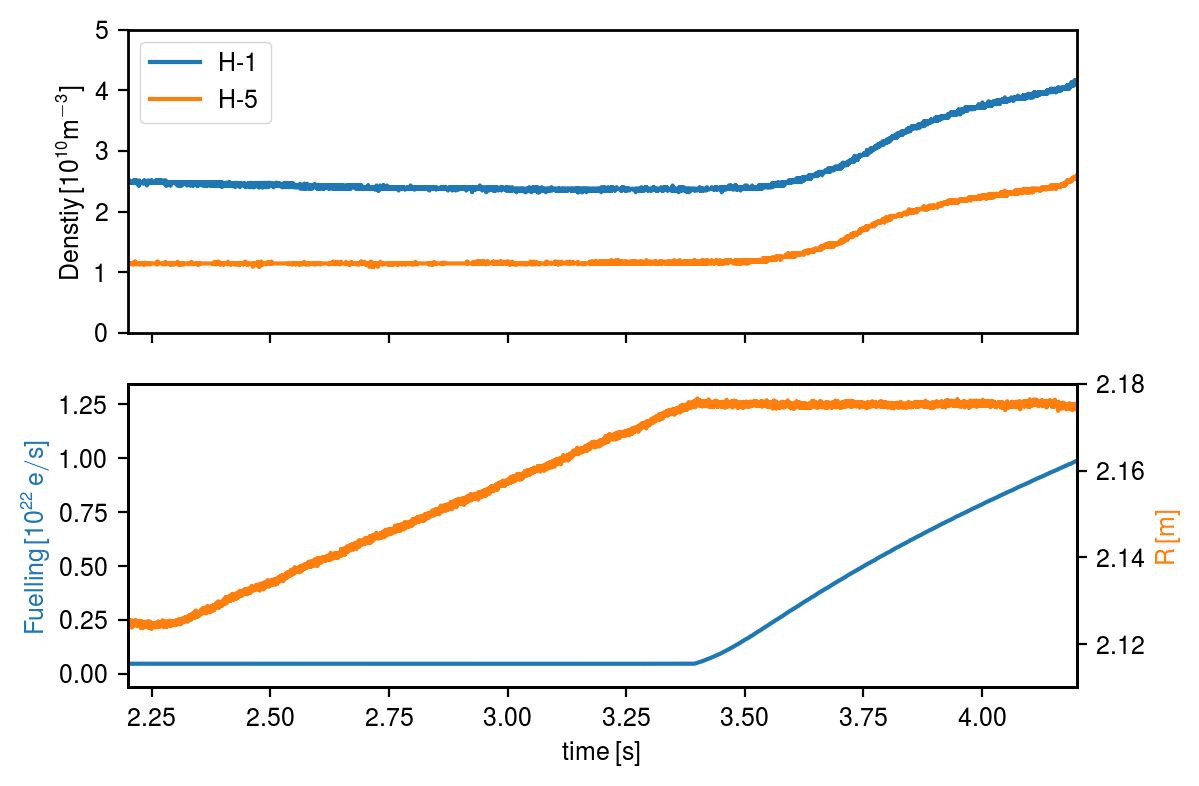

In [31]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(6,4),sharex=True,dpi=200)

t1 = 2.2
t2 = 4.2
ax[0].plot(h1.time, h1.data*1e-19, label='H-1')
ax[0].plot(h5.time, h5.data*1e-19, label='H-5')
ax[0].set_ylabel(r'$\mathrm{Denstiy\,[10^{10}m^{-3}]}$')
ax[0].set_xlim(t1,t2)
ax[0].set_ylim(0,5)

ax[0].legend(loc='best')

ax[1].plot(dtot.time, dtot.data*1e-22, label='D')
ax[1].set_ylabel(r'$\mathrm{Fuelling\,[10^{22}\,e/s]}$', color='C0')

ax2 = ax[1].twinx()
ax2.plot(raus.time, raus.data, label='Raus',color='C1')
ax2.set_ylabel(r'$\mathrm{R\,[m]}$', color='C1')
ax2.set_ylim(2.11,2.18)

ax[1].set_xlabel('time [s]')

plt.tight_layout()
plt.show()